## Question 1: Loading the Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Question 2: Loading the Dataset from Kaggle

In [57]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "ball_by_ball_ipl.csv"

# Load the latest version
ipl = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "jamiewelsh2/ball-by-ball-ipl",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

ipl.head()
ipl.drop('Unnamed: 0', axis=1, inplace=True)
ipl.head()

<ipython-input-57-d3c50007df31>:10: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  ipl = kagglehub.load_dataset(


,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,Non Striker,...,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
0,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,1,RD Gaikwad,DP Conway,...,Chennai Super Kings,0,4,0,1,0,NaN,NaN,4,1
1,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,2,RD Gaikwad,DP Conway,...,Chennai Super Kings,0,4,0,2,0,NaN,NaN,0,1
2,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,3,RD Gaikwad,DP Conway,...,Chennai Super Kings,0,4,0,3,0,NaN,NaN,0,1
3,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,4,RD Gaikwad,DP Conway,...,Chennai Super Kings,0,4,0,4,0,NaN,NaN,0,1
4,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,5,RD Gaikwad,DP Conway,...,Chennai Super Kings,0,5,0,5,0,NaN,NaN,1,1


## Question 3: Creating a Column 'season' which contains the Years

In [59]:
ipl['season'] = pd.to_datetime(ipl['Date']).dt.year

## Question 4: Creating a Function 'batsmen_stats' to filter out the Data using specific inputs

In [62]:
def batsmen_stats(ipl, season_range: tuple = None, year: int = None, Innings: int = None, over_range: tuple = None) -> pd.DataFrame:
    if season_range:
        start_season, end_season = season_range
        ipl = ipl[ipl['season'].between(start_season, end_season)]
    elif year:
        ipl = ipl[ipl['season'] == year]

    if over_range:
        start_over, end_over = over_range
        ipl = ipl[ipl['Over'].between(start_over, end_over)]

    if Innings:
        ipl = ipl[ipl['Innings'] == Innings]

    final_data = ipl.groupby('Batter').agg(total_runs=('Batter Runs', 'sum')).reset_index()
    return final_data
batsmen_stats(ipl, year = 2024)

,Batter,total_runs


## Question 5: Sorting the Data according to the most runs by the Batsman and then selection top 10 

In [66]:
#In 2022, find the top 10 batsmen who scored the most in the first innings

most_runs = batsmen_stats(ipl, year=2022, Innings=1).sort_values(by='total_runs', ascending = False).head(10)
most_runs

,Batter,total_runs
41,JC Buttler,671
53,KL Rahul,425
121,SV Samson,386
31,F du Plessis,333
21,D Padikkal,333
57,LS Livingstone,318
103,RD Gaikwad,309
34,HH Pandya,309
92,Q de Kock,301
111,S Dhawan,292


## Question 6: Visualising the Data using a Bar Chart 

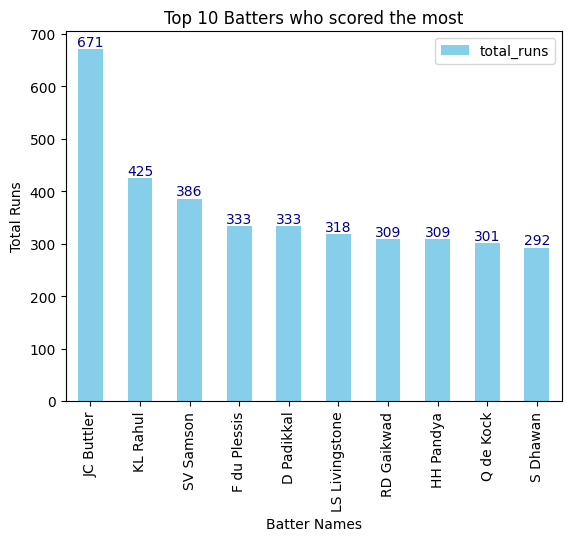

In [87]:
#Plotting the Bar Chart
ax = most_runs.plot(x='Batter', y='total_runs', kind='bar', xlabel='Batter Names', ylabel = 'Total Runs', color = 'skyblue', title = 'Top 10 Batters who scored the most')

#Labelling the runs of each player
for i, v in enumerate(most_runs['total_runs']):
    ax.text(i, v + 0.5, str(v) , ha='center', va='bottom', color='darkblue')


## Question 7: In 2022, find the top 10 batsmen who scored the most in the second innings

In [88]:
#In 2022, find the top 10 batsmen who scored the most in the second innings

most_runs2 = batsmen_stats(ipl, year=2022, Innings=2).sort_values(by='total_runs', ascending = False).head(10)
most_runs2

,Batter,total_runs
27,DA Miller,320
13,Abhishek Sharma,309
6,AK Markram,302
110,RA Tripathi,301
142,Shubman Gill,299
135,SS Iyer,297
28,DA Warner,270
149,Tilak Varma,265
91,N Pooran,260
45,Ishan Kishan,252


## Question 8: Plotting the Data using a Bar Chart

<ipython-input-101-77ea13c64f47>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = most_runs2, y='Batter', x='total_runs', palette = 'cool')


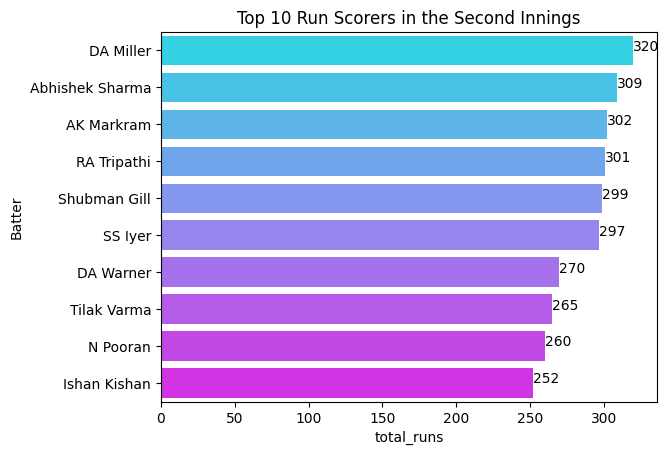

In [101]:
#Plotting the Bar Chart using seaborn
ax = sns.barplot(data = most_runs2, y='Batter', x='total_runs', palette = 'cool')

for i,v in enumerate(most_runs2['total_runs']):
    ax.text(v, i, v)
    plt.title("Top 10 Run Scorers in the Second Innings")


## Question 9: In 2022, find the top 10 batsmen who scored the most in the power play (Starting 6 Overs)

In [107]:
#In 2022, find the top 10 batsmen who scored the most in the power play (Starting 6 Overs)

most_runs3 = batsmen_stats(ipl, year=2022, over_range = (0,5)).sort_values(by='total_runs', ascending = False).head(10)
most_runs3

,Batter,total_runs
27,JC Buttler,329
54,Q de Kock,220
26,Ishan Kishan,203
15,DA Warner,200
59,RG Sharma,197
7,Abhishek Sharma,194
81,WP Saha,194
53,PP Shaw,192
64,S Dhawan,179
22,F du Plessis,171


## Question 10: Plotting the Data using a Bar chart

<ipython-input-108-0f0c9ee1761f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = most_runs3, y='Batter', x='total_runs', palette = 'hot')


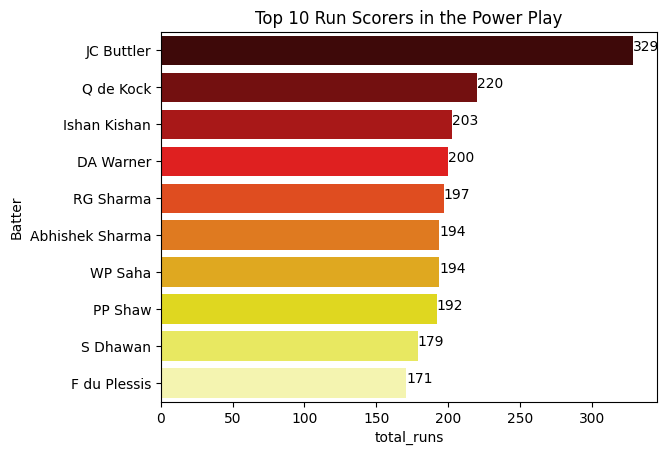

In [108]:
ax = sns.barplot(data = most_runs3, y='Batter', x='total_runs', palette = 'hot')

for i,v in enumerate(most_runs3['total_runs']):
    ax.text(v, i, v)
    plt.title("Top 10 Run Scorers in the Power Play")

## Question 11: In 2022, find the top 10 batsmen who scored the most in the Death Overs and 1st Innings

In [109]:
#In 2022, find the top 10 batsmen who scored the most in the Death Overs and 1st Innings

most_runs4 = batsmen_stats(ipl, year=2022, over_range = (14,19), Innings = 1).sort_values(by='total_runs', ascending = False).head(10)
most_runs4

,Batter,total_runs
93,SO Hetmyer,187
29,JC Buttler,177
41,KL Rahul,143
38,KD Karthik,139
44,LS Livingstone,114
56,MS Dhoni,112
89,S Dube,109
14,DA Miller,105
21,F du Plessis,105
74,R Parag,90


## Question 12: Plotting the Data using a Bar Chart

<ipython-input-115-9ef30283d0ab>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = most_runs4, y='Batter', x= 'total_runs', palette = 'rocket')


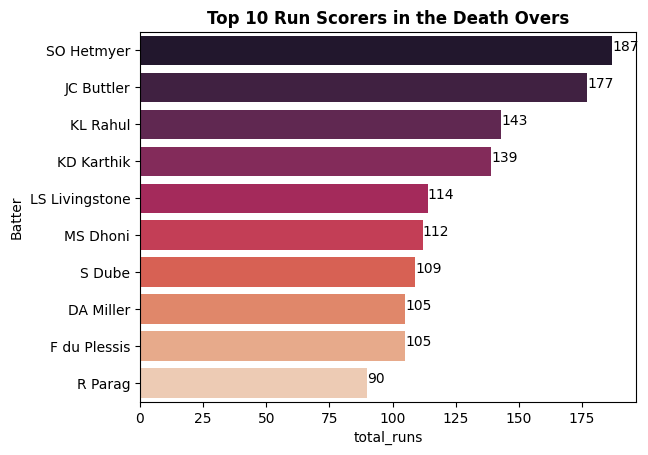

In [115]:
ax = sns.barplot(data = most_runs4, y='Batter', x= 'total_runs', palette = 'rocket')

for i,v in enumerate(most_runs4['total_runs']):
    ax.text(v, i, v)
    plt.title("Top 10 Run Scorers in the Death Overs", fontweight = 'bold')